#### Fancy indexing and index tricks
NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

##### Indexing with Arrays of Indices¶

In [1]:
import numpy as np

In [3]:
a = np.array(['A','B','C','D','E','F','G','H'])
a

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='<U1')

In [4]:
i = np.array([1,2])
i

array([1, 2])

In [5]:
a[i]

array(['B', 'C'], dtype='<U1')

In [6]:
j = np.array([[1,2],[2,3]])
j.ndim

2

In [7]:
a[j]

array([['B', 'C'],
       ['C', 'D']], dtype='<U1')

In [8]:
a = np.arange(12)*2                    # the first 12 square numbers
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [9]:
i = np.array( [ 1,1,3,8,5,6,11] )              # an array of indices
a[i]

array([ 2,  2,  6, 16, 10, 12, 22])

In [10]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )      # a bidimensional array of indices
a[j]                                    # the same shape as j

array([[ 6,  8],
       [18, 14]])

In [12]:
a[j].ndim

2

In [13]:
k = np.array([[[10,1],[2,6],[4,5]]])
a[k]

array([[[20,  2],
        [ 4, 12],
        [ 8, 10]]])

In [14]:
a[k].ndim

3

When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [15]:
palette = np.array( [[0,0,0],                # black
                     [255,0,0],              # red
                     [0,255,0],              # green
                     [0,0,255],              # blue
                     [20,55,255] ] )       # white

In [16]:
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [ 20,  55, 255]])

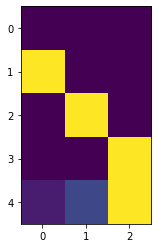

In [18]:
import matplotlib.pyplot as plt
plt.imshow(palette)

In [19]:
image = np.array( [ [100,24, 24, 5],           # each value corresponds to a color in the palette
...                 [5, 3, 38, 2]  ] )
print(image)


[[100  24  24   5]
 [  5   3  38   2]]


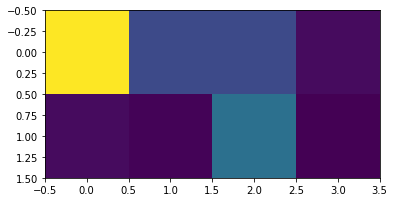

In [20]:
plt.imshow(image)

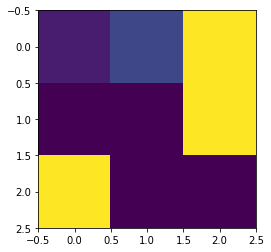

In [23]:
img = np.array([4,3,1])
plt.imshow(palette[img])                            # the (2,4,3) color image

We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.

In [24]:
a = np.arange(12).reshape(3,4);
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
i = np.array( [ [0,1],                        # indices for the first dim of a
...                 [1,2] ] )
i

array([[0, 1],
       [1, 2]])

In [26]:
j = np.array( [ [2,1],                        # indices for the second dim
...                 [3,3] ] )
j

array([[2, 1],
       [3, 3]])

In [27]:
a[i,j]                                     # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [28]:
i

array([[0, 1],
       [1, 2]])

In [29]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [31]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
j

array([[2, 1],
       [3, 3]])

In [39]:
a[j:]                                

TypeError: only integer scalar arrays can be converted to a scalar index

In [37]:
a[:,j]          # i.e., a[ : , j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

Naturally, we can put i and j in a sequence (say a list) and then do the indexing with the list.

In [40]:
l = [i,j]
l

[array([[0, 1],
        [1, 2]]), array([[2, 1],
        [3, 3]])]

In [41]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
a[l] 

c:\users\kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[ 2,  5],
       [ 7, 11]])

In [43]:
time = np.linspace(20, 145, 5)                 # time scale
print(time)

[ 20.    51.25  82.5  113.75 145.  ]


In [46]:
data = np.sin(np.arange(20)).reshape(5,4)      # 4 time-dependent series
print(data)

[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [48]:
ind = data.argmax(axis=0)                  # index of the maxima for each series
ind

array([2, 0, 3, 1], dtype=int64)

In [49]:
time_max = time[ind]                       # times corresponding to the maxima
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [50]:
a = np.arange(5)
print(a)

[0 1 2 3 4]


In [51]:
a[[1,3,4]] = 0
print(a)

[0 0 2 0 0]


### Indexing with Boolean Arrays

When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [52]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [53]:
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [54]:
a[b]  # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

In [55]:
c = a<5
a[c]

array([0, 1, 2, 3, 4])

#### The ix_() function

The ix_ function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a, b and c:

In [56]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8])

In [57]:
ax,bx,cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [58]:
cx

array([[[5, 4, 6, 8]]])

In [59]:
bx

array([[[8],
        [5],
        [4]]])

In [60]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 4))

In [61]:
result = ax+bx*cx            # shape is 4 arrays 3 rows and 4 col
result

array([[[42, 34, 50, 66],
        [27, 22, 32, 42],
        [22, 18, 26, 34]],

       [[43, 35, 51, 67],
        [28, 23, 33, 43],
        [23, 19, 27, 35]],

       [[44, 36, 52, 68],
        [29, 24, 34, 44],
        [24, 20, 28, 36]],

       [[45, 37, 53, 69],
        [30, 25, 35, 45],
        [25, 21, 29, 37]]])

In [62]:
result[1,2,3]

35

In [63]:
a[1]

3

In [64]:
b[2]

4

In [65]:
c[2]

6

In [66]:
a[1]+b[2]*c[2]      # 3+4*6

27

You could also implement the reduce as follows:

In [ ]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
        return r

In [ ]:
ufunc_reduce(np.add,a,b,c)